In [ ]:
import numpy as np
from numpy import asarray 
import pandas as pd
import xgboost as xgb
import sklearn

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving arrhymia.csv to arrhymia.csv


In [ ]:
# change to name of file uploaded
df = pd.read_csv("arrhymia.csv")

In [ ]:
df = df.dropna(axis=0, how='any')

In [ ]:
df.head()

,GENDER,AGE,HEIGHT,WEIGHT,FAM_HIST,RMSSD,ARRHYMIA
0,F,86,170.18,88.7,0,0.038665,0
1,F,88,170.18,72.0,0,0.907145,0
2,F,81,165.10,93.3,0,0.105568,0
3,F,84,152.40,64.4,0,1.328000,0
4,F,74,162.56,65.0,0,0.001713,0


In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()
df['GENDER'] = le.fit_transform(df['GENDER']) 

In [ ]:
# # CHANGING LABEL FROM STRING TO BINARY CATEGORY (0 OR 1)
# # use this on male/female, smoking/non-smoking, etc. 
# # this doesn't mess up ordering! in-place change
# df['statecode'] = le.fit_transform(df['statecode']) 

In [ ]:
# # ONE HOT ENCODING

# # change is a list of the titles of the columns you want to one-hot-encode
# change = ['statecode', 'county', 'line', 'construction']

# # WARNING
# # one-hot encoded columns are added to the end of the array
# # and the array they came from is deleted
# # so this might mess up ordering
# for i in range(len(change)):
#   df[change[i]]= le.fit_transform(df[change[i]]) 
#   ohe_data = ohe.fit_transform(df[[change[i]]]).toarray()
#   print(len(ohe.categories_[0]))
#   for j in range(len(ohe.categories_[0])):
#     df[change[i]+'_ohe_'+str(j)] = ohe_data[:,j]
#   df = df.drop(change[i], 1)

1
67
2
5


In [ ]:
df.head()

,GENDER,AGE,HEIGHT,WEIGHT,FAM_HIST,RMSSD,ARRHYMIA
0,0,86,170.18,88.7,0,0.038665,0
1,0,88,170.18,72.0,0,0.907145,0
2,0,81,165.10,93.3,0,0.105568,0
3,0,84,152.40,64.4,0,1.328000,0
4,0,74,162.56,65.0,0,0.001713,0


In [ ]:
# split into X and y
# example here
# y is the label
# be mindful of columns possibly being moved around after one-hot-encoding
# print df.head() to make sure
X, y = df.iloc[:,:-1], df.iloc[:,-1]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
# STROKE

# for i in range(5):
#   X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
#   xgb_model = xgb.XGBClassifier(max_depth = 20, 
#                                 eta = 0.5, 
#                                 silent = 1, 
#                                 objective = 'multi:softprob', 
#                                 num_class = 3, 
#                                 learning_rate = 0.001, 
#                                 n_estimators = 20, 
#                                 scale_pos_weight = 3)
#   xgb_model.fit(X_train, y_train)
#   print("Accuracy on validation set: {:.3f}".format(xgb_model.score(X_test, y_test)))

Accuracy on validation set: 0.924
Accuracy on validation set: 0.924
Accuracy on validation set: 0.932
Accuracy on validation set: 0.932
Accuracy on validation set: 0.926


In [ ]:
xgb_model = xgb.XGBClassifier(max_depth = 5, 
                              eta = 0.3, 
                              silent = 1, 
                              objective = 'multi:softprob', 
                              num_class = 3, 
                              learning_rate = 0.001, 
                              n_estimators = 5, 
                              scale_pos_weight = 3)

In [ ]:
classifier = GridSearchCV(SVC(cache_size=7000), tuned_parameters, refit='AUC',
                         scoring=make_scorer(metrics.accuracy_score))

NameError: ignored

In [ ]:
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eta=0.3, gamma=0,
              learning_rate=0.001, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=5, n_jobs=1,
              nthread=None, num_class=3, objective='multi:softprob',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=3,
              seed=None, silent=1, subsample=1, verbosity=1)

In [ ]:
print("Accuracy on training set: {:.3f}".format(xgb_model.score(X_train, y_train)))
print("Accuracy on validation set: {:.3f}".format(xgb_model.score(X_test, y_test)))

Accuracy on training set: 0.953
Accuracy on validation set: 0.955


In [ ]:
xgb_model = xgb.XGBClassifier(max_depth = 20, 
                              eta = 0.3, 
                              silent = 1, 
                              objective = 'multi:softprob', 
                              num_class = 3, 
                              learning_rate = 0.001, 
                              n_estimators = 20, 
                              scale_pos_weight = 3)

xgb_model.fit(X_train, y_train)

# make predictions for test data
y_pred = xgb_model.predict(X_test)
predictions = [round(value) for value in y_pred]

from sklearn.metrics import accuracy_score

# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Accuracy: 95.90%
[[1216    0]
 [  52    0]]


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Text(69.0, 0.5, 'Truth')

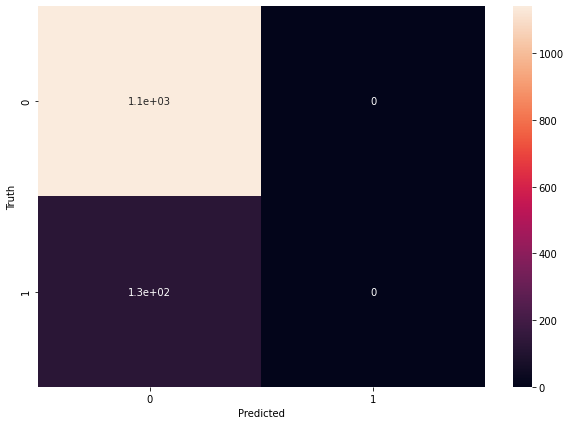

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sn 
plt.figure(figsize = (10, 7))
sn.heatmap(cm, annot = True)
# change label 0 1 2
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
from sklearn.metrics import precision_score
print(precision_score(y_test, best_preds, average='macro'))

NameError: ignored

In [ ]:
# save model for use later
# from sklearn.externals import joblib
# joblib.dump(bst, 'bst_model.pkl', compress=True)
# bst = joblib.load('bst_model.pkl') # load it later

# IF THIS DOESNT WORK, TRY SAVING METHOD FROM RANDOM FOREST?

In [ ]:
!pip install coremltools

     |████████████████████████████████| 3.4MB 5.0MB/s 


In [ ]:
# for saving this to your google drive

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
from sklearn.externals import joblib
import coremltools
from keras.models import load_model

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
# Convert it with default input and output names
coreml_model = coremltools.converters.xgboost.convert(xgb_model, mode="regressor")

# Saving the Core ML model to a file.
coreml_model.save('/content/gdrive/My Drive/XGB_cardiacarrest_coreml.mlmodel')